<a href="https://colab.research.google.com/github/mljarman/DS-Unit-2-Kaggle-Challenge/blob/master/module2/LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [14]:
# split train into train and val:
train, val = train_test_split(train, train_size=.8, test_size=.2, 
                              stratify=train['status_group'], random_state=42)
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [15]:
# identify majority class baseline:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

##Data Exploration and Cleaning:

In [0]:
# pandas profiling didn't work but worked yesterday? so will go off of yesterday's notebook.
''' high zeros:
amount_tsh 70% zeros **
construction_year 35% zeros
gps_height
longitude
num_private 99% zeros **
population


high cardinality:
date_recorded
funder
lga
installer
scheme_name
subvillage
ward
wpt_name

missing values:
funder
permit
public_meeting
scheme_management
scheme_name**

duplicates:
payment
payment_type
quantity
quantity_group

similar:
region
extraction_type
extraction_type_class
extraction_type_group
source_class (has missing)
source_type
waterpoint_type_group
water_quality
quality_group

change date_recorded to datetime '''





In [13]:
train['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [0]:
import numpy as np
import pandas as pd

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random), num_private(all 0's)
    unusable_variance = ['recorded_by', 'id', 'num_private', 'amount_tsh', 'scheme_name']
    X = X.drop(columns=unusable_variance)

    # Drop source_class, similar to source but source has no missing values:
    similars = ['source_class', 'region', 'extraction_type_group', 'waterpoint_type_group',
                'quality_group']
    X = X.drop(columns=similars)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # # Engineer feature: how many years from construction_year to date_recorded
    # X['years'] = X['year_recorded'] - X['construction_year']
    # X['years_MISSING'] = X['years'].isnull()
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
train['construction_year'].fillna(train['construction_year'].mean(), inplace=True)
val['construction_year'].fillna(train['construction_year'].mean(), inplace=True)
test['construction_year'].fillna(train['construction_year'].mean(), inplace=True)

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [23]:
# going to get a baseline random forest with all features and ordinal encoding:
%%time

# WARNING: the %%time command sometimes has quirks/bugs
X_train1 = train.drop(columns=target)
y_train1 = train[target]
X_val1 = val.drop(columns=target)
y_val1 = val[target]
X_test1 = test

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train1, y_train1)
print('Validation Accuracy', pipeline.score(X_val1, y_val1))

Validation Accuracy 0.8074074074074075
CPU times: user 17.9 s, sys: 176 ms, total: 18.1 s
Wall time: 9.85 s


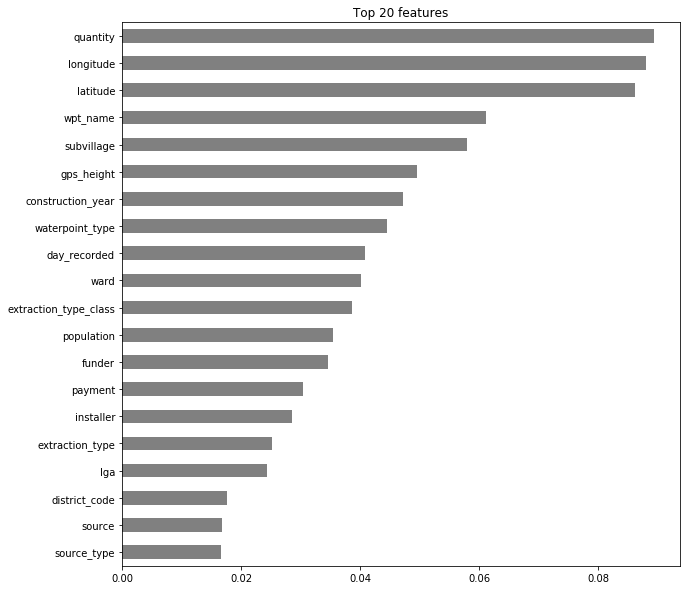

In [26]:
# feature importances:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf1 = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded1 = encoder.transform(X_train1)
importances1 = pd.Series(rf1.feature_importances_, encoded1.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='grey');

In [27]:
# going to try with omitting the high cardinality features w/ordinal encoding on rest:
%%time

# WARNING: the %%time command sometimes has quirks/bugs


import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8088383838383838
CPU times: user 14.4 s, sys: 359 ms, total: 14.7 s
Wall time: 7.88 s


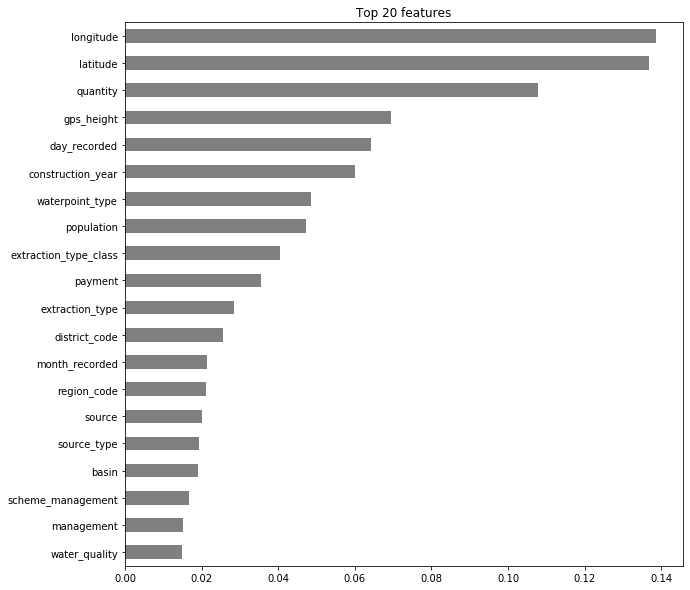

In [28]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [37]:
# the above didn't change anything, will try with selectKbest:
from sklearn.feature_selection import SelectKBest
sec_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    SelectKBest(k=27),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)


sec_pipeline.fit(X_train1, y_train1)
print('Train Accuracy', sec_pipeline.score(X_train1, y_train1))
print('Validation Accuracy', sec_pipeline.score(X_val1, y_val1))

Train Accuracy 0.9987794612794613
Validation Accuracy 0.7971380471380471


In [44]:
# w/high cardinality features removed:
# not better
from sklearn.feature_selection import SelectKBest
sec_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    SelectKBest(k=28),
    RandomForestClassifier(n_estimators=350, random_state=42, n_jobs=-1)
)


sec_pipeline.fit(X_train, y_train)
print('Train Accuracy', sec_pipeline.score(X_train, y_train))
print('Validation Accuracy', sec_pipeline.score(X_val, y_val))

Train Accuracy 0.997895622895623
Validation Accuracy 0.8097643097643098


In [49]:
# Try with one hot encoding and selectkbest:
from sklearn.feature_selection import SelectKBest
sec_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    SelectKBest(k=95),
    RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
)


sec_pipeline.fit(X_train, y_train)
print('Train Accuracy', sec_pipeline.score(X_train, y_train))
print('Validation Accuracy', sec_pipeline.score(X_val, y_val))

Train Accuracy 0.9977904040404041
Validation Accuracy 0.8038720538720538


In [0]:
# reduce cardinality for features
def small_n(X_train, X_val, X_test):
    cols = [i for i in X_train.columns if type(X_train[i].iloc[0]) == str]
    X_train[cols] = X_train[cols].where(X_train[cols].apply(lambda x: x.map(x.value_counts())) > 100, "other")
    for column in cols:
        for i in X_val[column].unique():
            if i not in X_train[column].unique():
                X_val[column].replace(i, 'other', inplace=True)
        for i in X_test[column].unique():
            if i not in X_train[column].unique():
                X_test[column].replace(i, 'other', inplace=True)
    return X_train, X_val, X_test

In [0]:
# reduce cardinality for features
def small_n(X_train1, X_val1, X_test1):
    cols = [i for i in X_train1.columns if type(X_train[i].iloc[0]) == str]
    X_train[cols] = X_train[cols].where(X_train1[cols].apply(lambda x: x.map(x.value_counts())) > 100, "other")
    for column in cols:
        for i in X_val1[column].unique():
            if i not in X_train1[column].unique():
                X_val1[column].replace(i, 'other', inplace=True)
        for i in X_test1[column].unique():
            if i not in X_train1[column].unique():
                X_test1[column].replace(i, 'other', inplace=True)
    return X_train1, X_val1, X_test1

In [85]:
# w/reduced cardinality on all features
# second submission******
from sklearn.feature_selection import SelectKBest
my_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    SelectKBest(k=28),
    RandomForestClassifier(n_estimators=450, random_state=42, n_jobs=-1)
)


my_pipeline.fit(X_train, y_train)
print('Train Accuracy', my_pipeline.score(X_train, y_train))
print('Validation Accuracy', my_pipeline.score(X_val, y_val))

Train Accuracy 0.997895622895623
Validation Accuracy 0.8101010101010101


In [83]:
# w/reduced cardinality on all features
# worse
from sklearn.feature_selection import SelectKBest
my_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    SelectKBest(k=28),
    RandomForestClassifier(n_estimators=450, random_state=42, n_jobs=-1)
)


my_pipeline.fit(X_train1, y_train)
print('Train Accuracy', my_pipeline.score(X_train1, y_train))
print('Validation Accuracy', my_pipeline.score(X_val1, y_val))

Train Accuracy 0.9988005050505051
Validation Accuracy 0.7966329966329966


In [66]:
# w/high cardinality features removed:
# not better
thi_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    SelectKBest(k=100),
    RandomForestClassifier(n_estimators=350, random_state=42, n_jobs=-1)
)


thi_pipeline.fit(X_train, y_train)
print('Train Accuracy', thi_pipeline.score(X_train, y_train))
print('Validation Accuracy', thi_pipeline.score(X_val, y_val))

Train Accuracy 0.9977904040404041
Validation Accuracy 0.8024410774410774


In [0]:
y_pred = my_pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Maggie-Jarman-submis3.csv', index=False)

In [0]:
from google.colab import files
files.download('Maggie-Jarman-submis3.csv')